# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

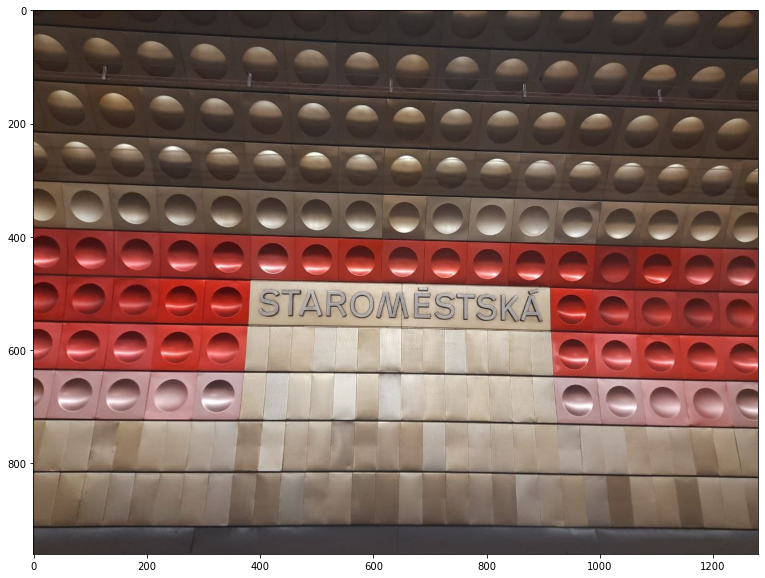

In [2]:
img = cv2.imread('data/praha.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

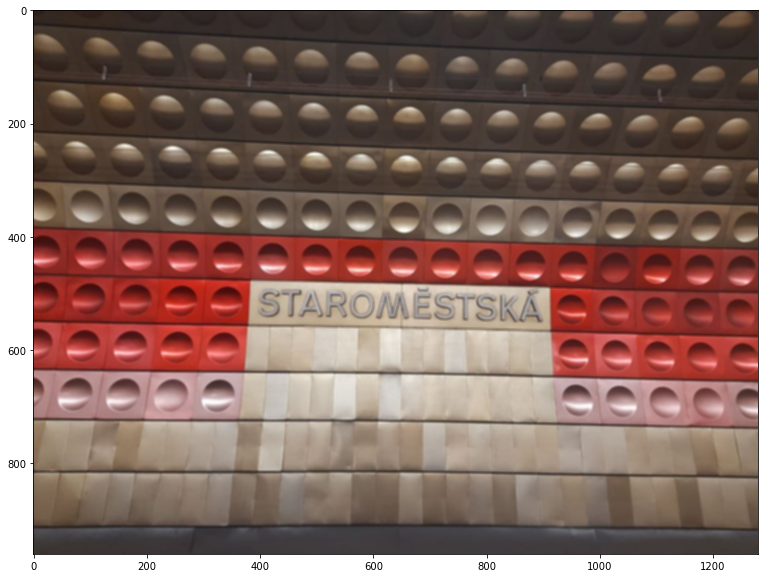

In [3]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(5,5), sigmaX=5)
plt.imshow(unsharp)

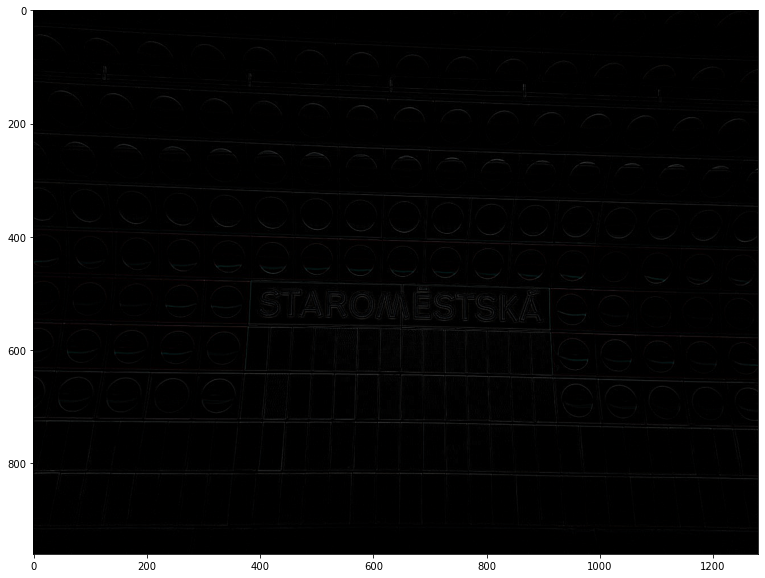

In [4]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = cv2.subtract(img, unsharp)
plt.imshow(diff)

In [ ]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened = cv2.addWeighted(img,1,diff,10,0)
plt.imshow(sharpened)

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?

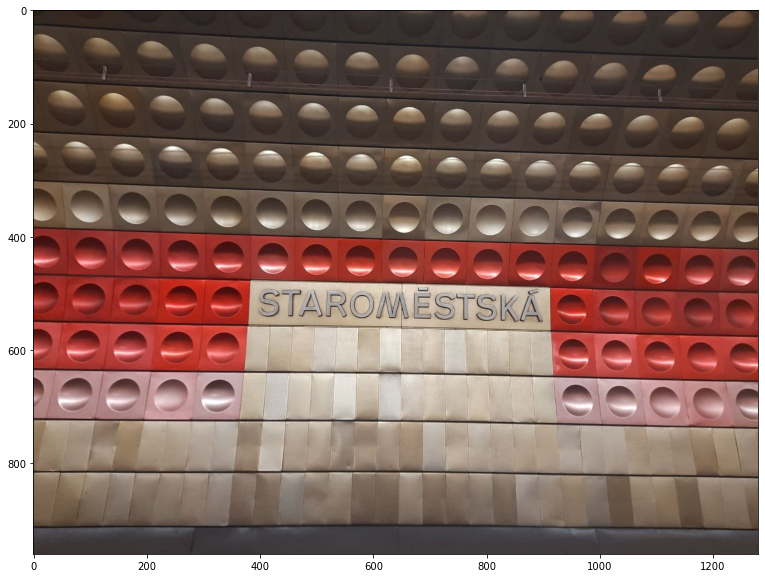

In [5]:
plt.imshow(cv2.addWeighted(img,1,diff,0.1,0))

*Когда значение `amount` слишком маленькое (близко к 0) - изображение не отличается по резкости от изначального*

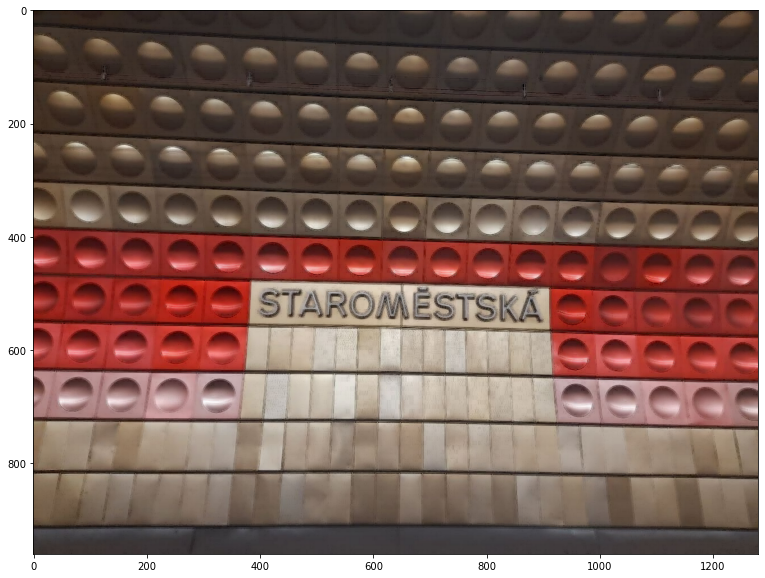

In [6]:
plt.imshow(cv2.addWeighted(img,1,diff,-3,0))

*Когда значение `amount` отрицательное - изображение теряет резкость*

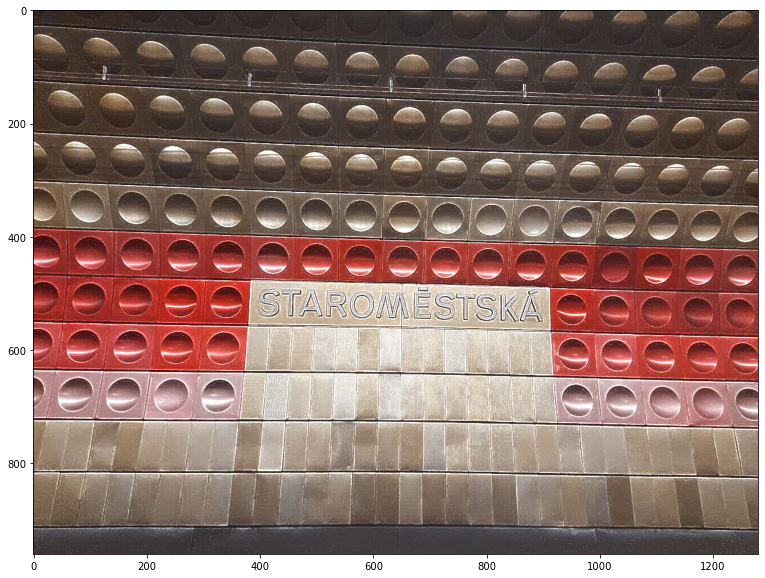

In [7]:
plt.imshow(cv2.addWeighted(img,1,diff,7,0))

*Когда значение `amount` слишком большое - изображение становится слишком резким*